# Finding The Key Regulated Nodes In The Glycolysis Pathway¶

N.A. Mahalakshmi Srinivasan
mahalakshmi@nasbioventures.com

Lets find out the key regulated nodes in the Human Glycolysis Pathway, using KEGG PATHWAY!

Any biochemical pathway have their own set of nodes (biomolecules) and the interactions between them represented as edges. Nodes get regulated and regulate other nodes. Using one of the vital biochemical processes of a cell - Glycolysis, we shall find out the most regulated nodes from the pathway. Glycolysis is the process that describes the breakdown of glucose (sugar) or glycogen (stored carbohydrate) and releases energy. While a pathway requires all its nodes and edges to complete the process, this study will help us understand the kind of regulations into which each of the node is involved. Though a node could play a significant role in regulation, it doesn’t stop it from being regulated by other nodes in the pathway. The scope of this project is to get information about highly regulated nodes of the biochemical pathway - Glycolysis. 

We shall be able to analyse using KEGG and R. KEGG stands for “Kyoto Encyclopedia of Genes and Genomes”. It has been developed and maintained by Kaneshisa Laboratories, since 1995. KEGG is a database resource for understanding high level functions and utilities of the biological system such as single cell, organism or ecosystem, using molecular data.

With KEGG, we can get an understanding of: 

  The bimolecular pathways,

  Functional hierarchies of the biomolecules, 

  Explore subset of pathways or functional units, 

  Functional orthologs,

  Gain access to: Biological genomes which includes metagenomes, Genes, Proteins, Small molecules, Glycans, Enzymatic 
  reactions, Perturbed states of the molecular network system when in a diseased state to investigate the “network  
  variation maps”, Structurally and functionally related group of drugs.

The Architecture of KEGG website comprises of: 

  Top page, which is the KEGG homepage,
  
  KEGG2 page is the main entry point to the KEGG web service, DB (database) entry points,
  
  DB (database) contents,
  
  Software tools (at the KEGG main site excluding those at the GenomeNet mirror site).
  
GenomeNet is the mirror site of KEGG website. The GenomeNet service has been developed by the Kanehisa Laboratory in Kyoto University as part of the research projects.

Dataset for this project shall be the KEGG pathway for Human Glycolysis: hsa:00010. During this analysis, we will see how KEGG PATHWAYS can be searched, visualised using R / Bioconductor and obtain the answer for question in hand by probing this KEGG PATHWAY.


TASK I: SEARCH FOR KEGG PATHWAY OF INTEREST AND VISUALISE IN R

In [1]:
#Installing the following packages required for the project:
#BiocManager package: Access the Bioconductor Project Package Repository
#KEGGREST package: To query the KEGG database. 
#KEGGgraph package: It parses the regularly updated KGML (KEGG XML) files into graph models maintaining all essential pathway attributes. The package offers functionalities including parsing, graph operation, visualization.
#Rgraphviz package: Interfaces R with the graphviz (Graph Visualization) library for plotting R graph objects from the graph package.
#igraph package: to create a pathway

In [2]:
install.packages("BiocManager")
library("BiocManager")
BiocManager::install("KEGGREST")
BiocManager::install("KEGGgraph")
BiocManager::install("Rgraphviz")
install.packages("igraph")

library("KEGGREST")
library("KEGGgraph")
library("Rgraphviz")
library("igraph")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Bioconductor version 3.8 (BiocManager 1.30.4), R 3.5.1 (2018-07-02)
Installing package(s) 'KEGGREST'
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Update old packages: 'BH', 'MASS', 'Matrix', 'ModelMetrics', 'RCurl',
  'RJSONIO', 'Rcpp', 'TTR', 'XML', 'backports', 'broom', 'caTools', 'callr',
  'caret', 'class', 'clipr', 'cluster', 'codetools', 'colorspace',
  'commonmark', 'curl', 'data.table', 'dbplyr', 'ddalpha', 'devtools',
  'dimRed', 'dplyr', 'edgeR', 'fansi', 'forcats', 'formatR', 'geometry',
  'ggplot2', 'git2r', 'glue', 'gower', 'gtable', 'haven', 'highr',
  'htmlwidgets', 'httpuv', 'httr', 'igraph', 'ipred', 'kernlab', 'knitr',
  'later', 'lattice', 'lava', 'lazyeval', 'magic', 'markdown', 'mgcv', 'mime',
  'modelr', 'mongolite', 'odbc', 'openssl', 'packrat', 'pathview', 'pillar',
  'pkgbuild', 'pkgconfig', 'pkgload', 'pls', 'processx', 'purrr', 'quantmod',
  'rJava',

In [3]:
#keggFind function: Finds Entries With Matching Query Keywords.
keggFind("pathway", "Glycolysis")

path:map00010 
"Glycolysis / Gluconeogenesis"

A graphNEL graph with directed edges
Number of Nodes = 265 
Number of Edges = 876 

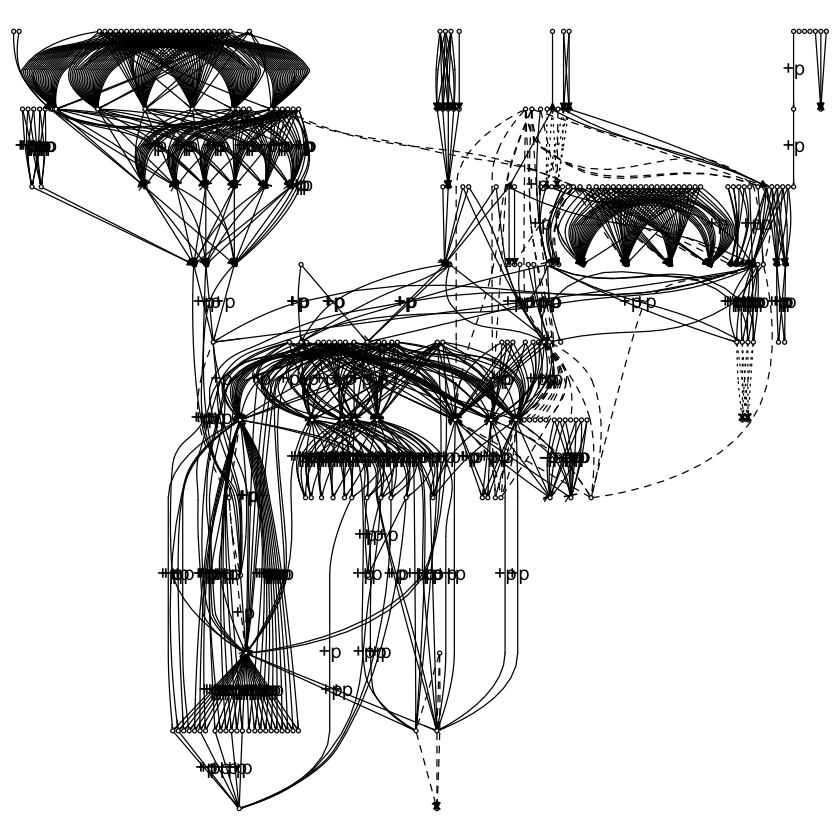

In [4]:
#Viewing the KEGG PATHWAY, in R:
file1 <- system.file("extdata/hsa04010.xml",package="KEGGgraph")
graph1 <- parseKGML2Graph(file1,expandGenes=TRUE)
graph1
plotKEGGgraph(graph1, y = "neato", shortLabel = TRUE, useDisplayName=TRUE)

#system.file function: Finds the full file names of files in packages. This checks the existence of the specified files with file.exists. So file paths are only returned if there are sufficient permissions to establish their existence.
#parseKGML2Graph function: This function is a wrapper for parseKGML and KEGGpathway2Graph. It takes two actions: first it reads in the KGML file and parses it into an object of KEGGPathway-class, the second step it calls KEGGpathway2Graph function to return the graph model.
#graph1 Output is of the Number of Nodes and Number of Edges
#plotKEGGgraph function: The function provides a simple interface to Rgraphviz to render KEGG graph with custom styles.

#The following pathway is the Human Glycolysis Pathway, plotted in R:

A graphNEL graph with directed edges
Number of Nodes = 265 
Number of Edges = 876 

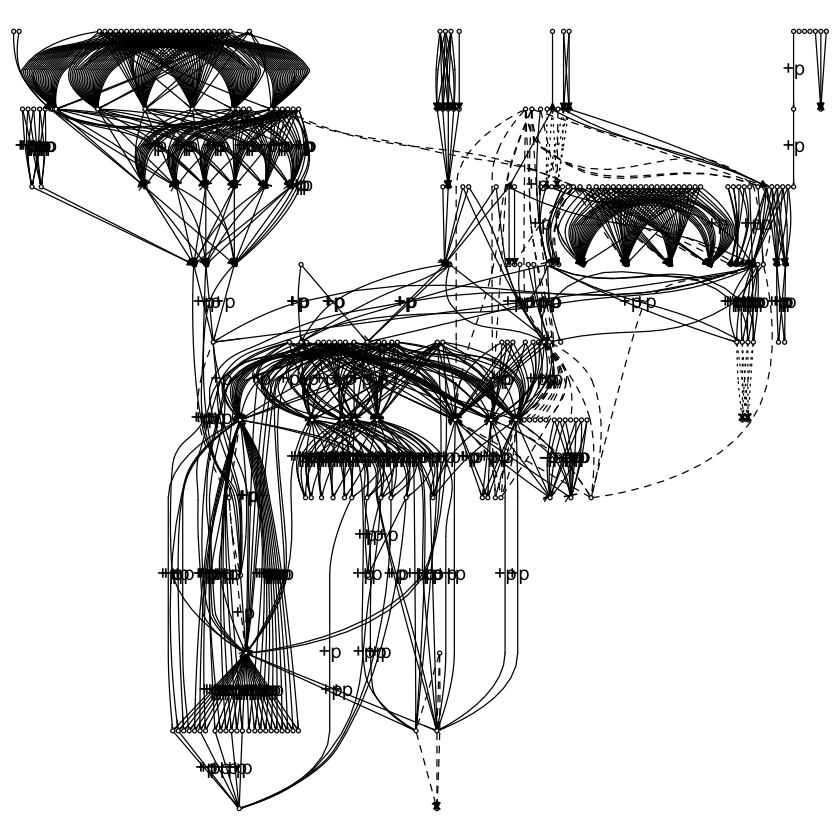

In [5]:
#ALTERNATIVE APPROACH WOULD BE TO FIRST PARSE THE KGML FILE INTO KEGG OBJECT, WHICH IS LATER CONVERTED TO A GRAPH OBJECT
file1 <- system.file("extdata/hsa04010.xml",package="KEGGgraph")
graph3 <- parseKGML(file1)
graph2 <- KEGGpathway2Graph(graph3, expandGenes = TRUE)
graph2
plotKEGGgraph(graph2, y = "neato", shortLabel = TRUE, useDisplayName=TRUE)

#parseKGML function: The function parses KGML files according to the KGML XML documentation.

TASK II: QUERYING THE NODES AND EDGES, TO FIND THE NODES PLAYING KEY ROLE IN REGULATION:

In [49]:
# To find the number of incoming edges for a node. These data have significance in understanding the role of the node in the pathway

inward <- sapply(inEdges(graph1), length)
maxinward <- sort(inward, decreasing=T)
maxinward[1:5]

#inEdges function: Returns a list of all incoming edges for the specified nodes.
#sapply function:The purpose is to apply function to every element and obtain the output.
#sort function: Sort (or order) a vector into ascending or descending order.

hsa:5923   hsa:5924  hsa:10125  hsa:10235 hsa:115727 
        26         26         26         26         26

In [52]:
#Obtaining information about a particular node / nodes. The node 'has:5923' has maximum number of incoming edges.
getnodedata <- keggGet("hsa:5923")
getnodedata

[[1]]
[[1]]$ENTRY
   CDS 
"5923" 

[[1]]$NAME
[1] "RASGRF1, CDC25, CDC25L, GNRP, GRF1, GRF55, H-GRF55, PP13187, ras-GRF1"

[[1]]$DEFINITION
[1] "(RefSeq) Ras protein specific guanine nucleotide releasing factor 1"

[[1]]$ORTHOLOGY
                                              K04349 
"Ras-specific guanine nucleotide-releasing factor 1" 

[[1]]$ORGANISM
                   hsa 
"Homo sapiens (human)" 

[[1]]$PATHWAY
                hsa04010                 hsa04014                 hsa04510 
"MAPK signaling pathway"  "Ras signaling pathway"         "Focal adhesion" 

[[1]]$BRITE
 [1] "KEGG Orthology (KO) [BR:hsa00001]"          
 [2] " 09130 Environmental Information Processing"
 [3] "  09132 Signal transduction"                
 [4] "   04014 Ras signaling pathway"             
 [5] "    5923 (RASGRF1)"                         
 [6] "   04010 MAPK signaling pathway"            
 [7] "    5923 (RASGRF1)"                         
 [8] " 09140 Cellular Processes"                  
 [9] "  0

In [89]:
#Below, we are finding information about remaining nodes regulated by 26 other nodes. 

In [64]:
getnodedata1 <- keggGet("hsa:5924")
getnodedata2 <- keggGet("hsa:10125")
getnodedata3 <- keggGet("hsa:10235")
getnodedata4 <- keggGet("hsa:115727")

In [65]:
getnodedata1
getnodedata2
getnodedata3
getnodedata4

[[1]]
[[1]]$ENTRY
   CDS 
"5924" 

[[1]]$NAME
[1] "RASGRF2, GRF2, RAS-GRF2"

[[1]]$DEFINITION
[1] "(RefSeq) Ras protein specific guanine nucleotide releasing factor 2"

[[1]]$ORTHOLOGY
                                              K12326 
"Ras-specific guanine nucleotide-releasing factor 2" 

[[1]]$ORGANISM
                   hsa 
"Homo sapiens (human)" 

[[1]]$PATHWAY
                hsa04010                 hsa04014 
"MAPK signaling pathway"  "Ras signaling pathway" 

[[1]]$BRITE
[1] "KEGG Orthology (KO) [BR:hsa00001]"          
[2] " 09130 Environmental Information Processing"
[3] "  09132 Signal transduction"                
[4] "   04014 Ras signaling pathway"             
[5] "    5924 (RASGRF2)"                         
[6] "   04010 MAPK signaling pathway"            
[7] "    5924 (RASGRF2)"                         

[[1]]$POSITION
[1] "5q14.1"

[[1]]$MOTIF
[1] "Pfam: RasGEF RhoGEF RasGEF_N PH PH_11 IQ PH_17"

[[1]]$DBLINKS
[1] "NCBI-GeneID: 5924"                 "NCBI-Protein

[[1]]
[[1]]$ENTRY
    CDS 
"10125" 

[[1]]$NAME
[1] "RASGRP1, CALDAG-GEFI, CALDAG-GEFII, RASGRP"

[[1]]$DEFINITION
[1] "(RefSeq) RAS guanyl releasing protein 1"

[[1]]$ORTHOLOGY
                          K04350 
"RAS guanyl-releasing protein 1" 

[[1]]$ORGANISM
                   hsa 
"Homo sapiens (human)" 

[[1]]$PATHWAY
                           hsa04010                            hsa04014 
           "MAPK signaling pathway"             "Ras signaling pathway" 
                           hsa04611                            hsa04660 
              "Platelet activation" "T cell receptor signaling pathway" 
                           hsa05200 
               "Pathways in cancer" 

[[1]]$BRITE
 [1] "KEGG Orthology (KO) [BR:hsa00001]"          
 [2] " 09130 Environmental Information Processing"
 [3] "  09132 Signal transduction"                
 [4] "   04014 Ras signaling pathway"             
 [5] "    10125 (RASGRP1)"                        
 [6] "   04010 MAPK signaling pathway"   

[[1]]
[[1]]$ENTRY
    CDS 
"10235" 

[[1]]$NAME
[1] "RASGRP2, CALDAG-GEFI, CDC25L"

[[1]]$DEFINITION
[1] "(RefSeq) RAS guanyl releasing protein 2"

[[1]]$ORTHOLOGY
                          K12361 
"RAS guanyl-releasing protein 2" 

[[1]]$ORGANISM
                   hsa 
"Homo sapiens (human)" 

[[1]]$PATHWAY
                     hsa04010                      hsa04014 
     "MAPK signaling pathway"       "Ras signaling pathway" 
                     hsa04015                      hsa04062 
     "Rap1 signaling pathway" "Chemokine signaling pathway" 
                     hsa04611                      hsa05200 
        "Platelet activation"          "Pathways in cancer" 

[[1]]$DISEASE
                           H01235 
"Bleeding disorder platelet-type" 

[[1]]$BRITE
 [1] "KEGG Orthology (KO) [BR:hsa00001]"          
 [2] " 09130 Environmental Information Processing"
 [3] "  09132 Signal transduction"                
 [4] "   04014 Ras signaling pathway"             
 [5] "    10235 (RASG

[[1]]
[[1]]$ENTRY
     CDS 
"115727" 

[[1]]$NAME
[1] "RASGRP4"

[[1]]$DEFINITION
[1] "(RefSeq) RAS guanyl releasing protein 4"

[[1]]$ORTHOLOGY
                          K12363 
"RAS guanyl-releasing protein 4" 

[[1]]$ORGANISM
                   hsa 
"Homo sapiens (human)" 

[[1]]$PATHWAY
                hsa04010                 hsa04014                 hsa05200 
"MAPK signaling pathway"  "Ras signaling pathway"     "Pathways in cancer" 

[[1]]$BRITE
 [1] "KEGG Orthology (KO) [BR:hsa00001]"          
 [2] " 09130 Environmental Information Processing"
 [3] "  09132 Signal transduction"                
 [4] "   04014 Ras signaling pathway"             
 [5] "    115727 (RASGRP4)"                       
 [6] "   04010 MAPK signaling pathway"            
 [7] "    115727 (RASGRP4)"                       
 [8] " 09160 Human Diseases"                      
 [9] "  09161 Cancers: Overview"                  
[10] "   05200 Pathways in cancer"                
[11] "    115727 (RASGRP4)"      

In [66]:
#getKEGGedgeData function: The 'get' methods extracts KEGG edge attributes from a graph produced by calling parseKGML2Graph or KEGGpathway2Graph.
getedgedata <- getKEGGedgeData(graph1)
getedgedata

$`hsa:5923~hsa:22800`
  KEGG Edge (Type: PPrel):
------------------------------------------------------------
[ Entry 1 ID ]: hsa:5923
[ Entry 2 ID ]: hsa:22800
[ Subtype ]: 
  [ Subtype name ]: activation
  [ Subtype value ]: -->
------------------------------------------------------------

$`hsa:5923~hsa:22808`
  KEGG Edge (Type: PPrel):
------------------------------------------------------------
[ Entry 1 ID ]: hsa:5923
[ Entry 2 ID ]: hsa:22808
[ Subtype ]: 
  [ Subtype name ]: activation
  [ Subtype value ]: -->
------------------------------------------------------------

$`hsa:5923~hsa:3265`
  KEGG Edge (Type: PPrel):
------------------------------------------------------------
[ Entry 1 ID ]: hsa:5923
[ Entry 2 ID ]: hsa:3265
[ Subtype ]: 
  [ Subtype name ]: activation
  [ Subtype value ]: -->
------------------------------------------------------------

$`hsa:5923~hsa:3845`
  KEGG Edge (Type: PPrel):
------------------------------------------------------------
[ Entry 1 ID ]

TASK III: REPRESENTING A NODE WITH THE HIGHEST NUMBER OF REGULATIONS IN A GRAPHICAL FORMAT:

In [85]:
#Creating a compilation of the nodes and edges, exporting data as .txt file to the current working directory
class(getedgedata)
n <- as.matrix(getedgedata)
class(n)
write.table(n, "edgedata.txt")

[1] "list"

[1] "matrix"

The exported text is with the details of connectivity between nodes. Since, we are studying here about a node being regulated, we have to consider data, where this node is entry2ID. Please see the attachment.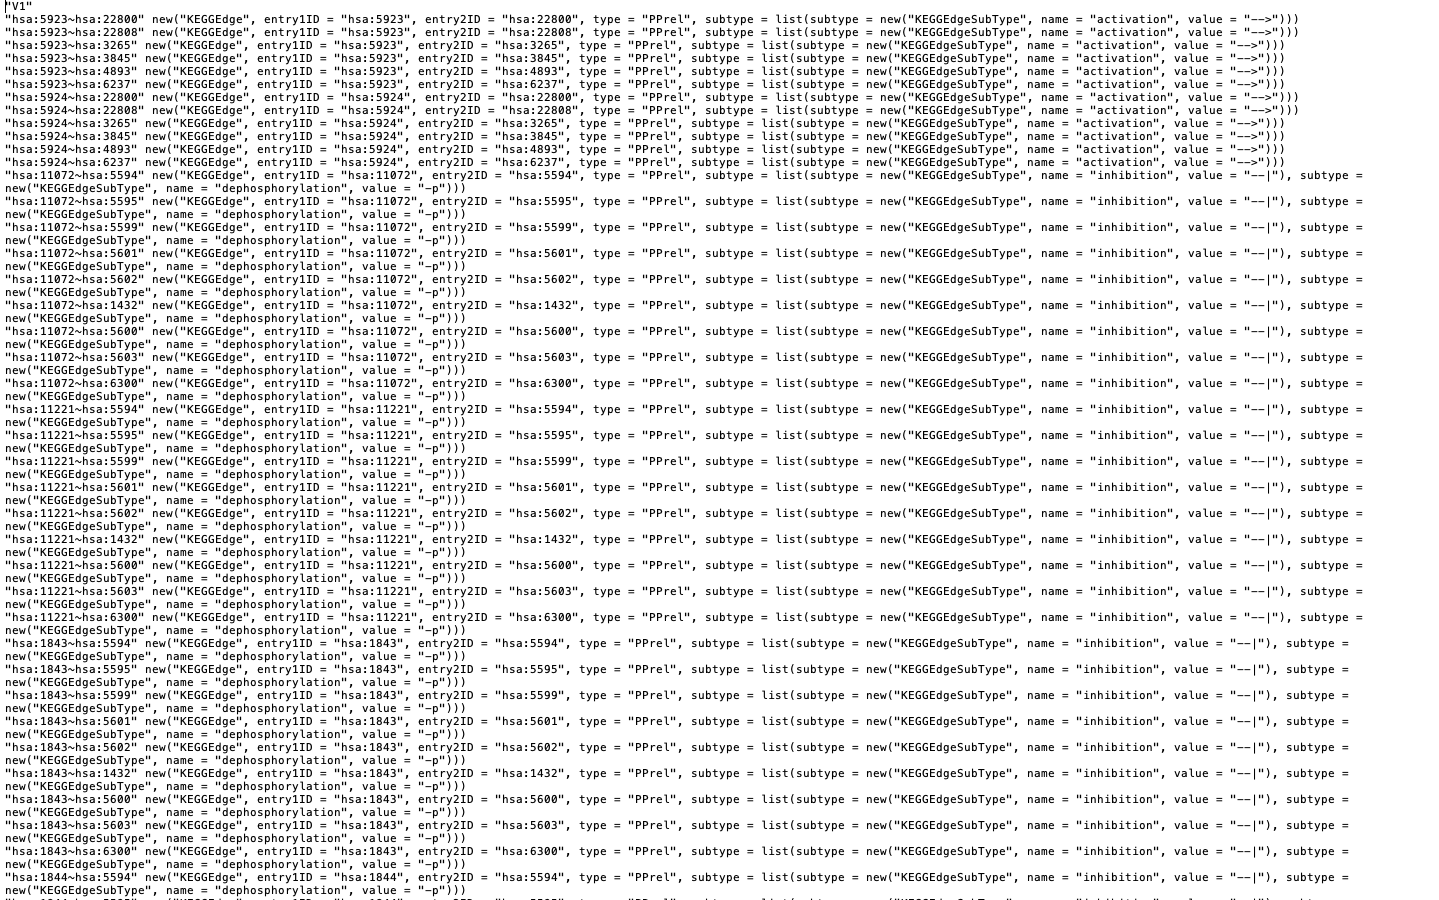

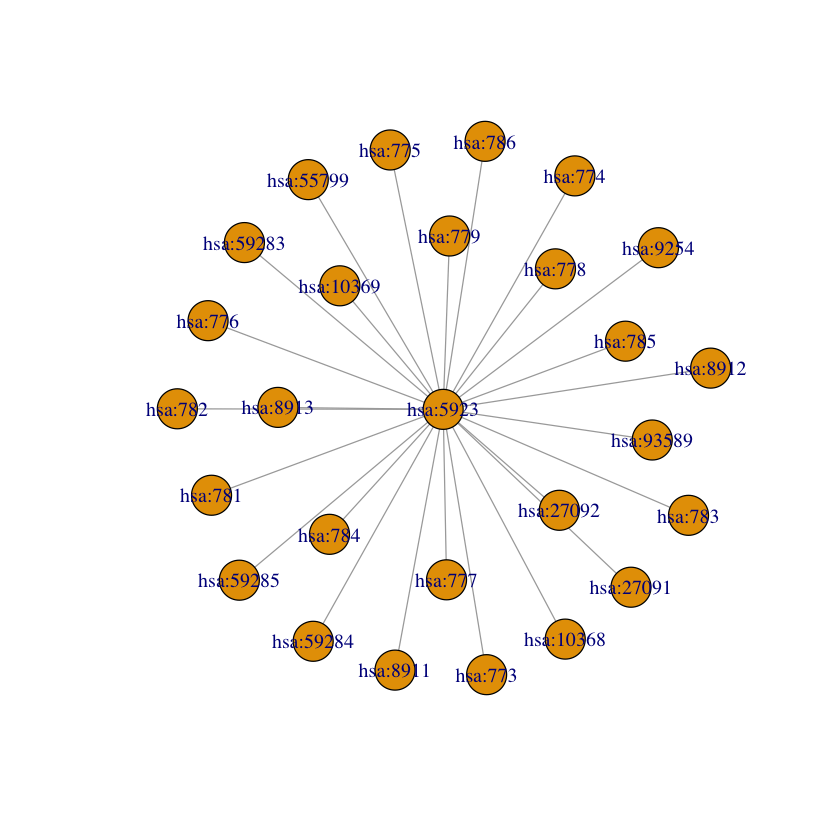

In [88]:
#Creating a graph which represents graphically the regulation a given node by other nodes. We have chosen a single node (edges directed towards from this node). 

g1<-graph(edges=c("hsa:10368","hsa:5923", "hsa:10369","hsa:5923", "hsa:27091","hsa:5923", "hsa:27092","hsa:5923", "hsa:55799","hsa:5923","hsa:59283","hsa:5923","hsa:59284","hsa:5923","hsa:59285","hsa:5923","hsa:773","hsa:5923","hsa:774","hsa:5923","hsa:775","hsa:5923","hsa:776","hsa:5923","hsa:777","hsa:5923","hsa:778","hsa:5923","hsa:779","hsa:5923","hsa:781","hsa:5923","hsa:782","hsa:5923", "hsa:783","hsa:5923", "hsa:784","hsa:5923","hsa:785","hsa:5923","hsa:786","hsa:5923","hsa:8911","hsa:5923","hsa:8912","hsa:5923","hsa:8913","hsa:5923", "hsa:9254","hsa:5923","hsa:93589","hsa:5923"), directed=F)
plot(g1)

CONCLUSION:

Below are the list of 5 nodes, each regulated by 26 other nodes:

Ras protein specific guanine nucleotide releasing factor 1 

Ras protein specific guanine nucleotide releasing factor 2 

RAS guanyl releasing protein 1 

RAS guanyl releasing protein 2 

RAS guanyl releasing protein 4



From this study, we understand that the most regulated nodes are associated with the RAS protein subfamily.

All Ras protein family members belong to a class of protein called small GTPase.

They are involved in cellular signal transduction. When Ras is activated by incoming signals, it subsequently switches on other proteins, which ultimately turn on genes involved in cell growth. Regulation of Ras protein is very important. Mutations in ras genes can lead to the production of permanently activated Ras proteins, a cause of cancer. Hence, Ras proteins are normally tightly regulated by factors that switch off the GTPase activity.